# Neural Networks

Credits:
- [Metis](https://www.thisismetis.com)
- [Harsh Pokharna: For Dummies — The Introduction to Neural Networks we all need !](https://medium.com/technologymadeeasy/for-dummies-the-introduction-to-neural-networks-we-all-need-c50f6012d5eb#.93dgf0vg2)

Artificial Neural Networks are a computational approach that mimics brain function: a large collection of linked neural units.

![Neuron](https://cdn-images-1.medium.com/max/1600/1*MnmwgNzk5YkMhC3Ttb09SQ.jpeg)

![Perceptron Neural Net](https://cdn-images-1.medium.com/max/1600/1*nRRXhhjSjKNpGn-T3yF2Ew.jpeg)
_A perceptron is the digital equivalent of a neuron, firing if strength of inputs exceeds its threshold `theta`_

![Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/296px-Colored_neural_network.svg.png)
_General Neural Network with Hidden Layer_

## Derivatives / Gradient Descent to optimize the "weights"

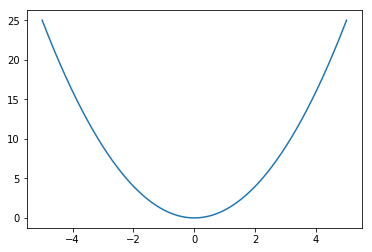

In [2]:
# plot y = x-squared
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.linspace(-5,5,1000)
y = x**2
plt.plot(x,y);

In [3]:
# create our function
def f(x):
    return x**2

In [4]:
# define values
epsilon = 1e-5
x = 3

In [5]:
# calculate delta y / delta x
gradient = (f(x+epsilon) - f(x-epsilon)) / (2*epsilon)

In [79]:
# compare with our known calculus solution
gradient

7.999999999785955

We can use gradient descent to minimize a cost function, thereby optimizing our weights.

# ANNs in Sklearn
[Multi-layer Perceptron (MLP)](http://scikit-learn.org/stable/modules/neural_networks_supervised.html) models in sklearn

The advantages of MLP are:
- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages of MLP include:
- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

In [63]:
# build simple neural net with sklearn: An "OR" gate
from sklearn.neural_network import MLPClassifier

X = [[0., 0.], [1., 1.], [1., 0.], [0., 1.]]
y = [0, 1, 1, 1]

clf = MLPClassifier(hidden_layer_sizes=(5,2),
                    solver='lbfgs',
                    random_state=42)
clf.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [64]:
# predict new observations
clf.predict([[0,1]])

array([1])

In [65]:
# find parameters
print([coef.shape for coef in clf.coefs_])
clf.coefs_

[(2, 5), (5, 2), (2, 1)]


[array([[-0.11413747, -0.11261696,  2.79790837,  0.08975482, -0.31293797],
        [-0.31295991,  0.77513868,  2.38020697,  0.09198965,  0.18929459]]),
 array([[-0.2880236 , -0.17809115],
        [ 0.01305967, -0.0619132 ],
        [ 2.34385475,  0.10175847],
        [-0.32797143, -0.18909697],
        [-0.12157767, -0.03996545]]),
 array([[ 3.30261953],
        [ 0.12842577]])]

In [77]:
clf.predict([[2,2]])

array([1])

In [76]:
clf.predict([[-2,2]])

array([0])

In [78]:
clf.predict([[-2,-2]])

array([0])

### Scaling
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data.


### Solver options
L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, Adam is performant and robust. SGD with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.